# Análise Exploratória dos microdados ENEM 2019 - Sócioeconômico

Documentação do Pandas: http://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
import pandas as pd

Ler o conjunto de dados

In [2]:
microdadosEnem = pd.read_csv('D:/Projetos/dadosBrutos/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1')

In [3]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


Lista de colunas

In [4]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Selecionar somentes colunas que me interessam

In [5]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT',
                      'NU_NOTA_REDACAO', 'Q001', 'Q002']

criar um novo Dataframe apenas com os dados que serão analisados

In [6]:
microdadosEnemSelecionados = microdadosEnem.filter(items = colunasSelecionadas)

In [7]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,369.1,780.0,D,E
1,190001004628,416.5,600.0,D,E
2,190001004629,571.5,640.0,H,E
3,190001004630,NaN,NaN,D,D
4,190001004631,NaN,NaN,B,C


Removendo os NaN: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [8]:
microdadosEnemSelecionados = microdadosEnemSelecionados.dropna()

In [9]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,369.1,780.0,D,E
1,190001004628,416.5,600.0,D,E
2,190001004629,571.5,640.0,H,E
5,190001004632,605.3,580.0,C,C
6,190001004633,581.5,360.0,B,B


# Analisar o questionário de indicadores socioeconômicos

Vendo duas questões:
Q001 - Até que série o pai ou homem responsável pelo candidato estudou?
Q002 - Até que série a mãe ou mulher responsável pelo candidato estudou?

## Passo 1 - Definindo um dicionário:

Isso servirá para visualizar melhor o resultado

In [10]:
q001e002Dicionario = {'A':'Nunca Estudou',
                     'B':'Não completou a 4ª Série/5º ano do Ensino Fundamental',
                     'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                     'D':'Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio',
                     'E':'Completou o Ensino Médio, mas não completou a Faculdade',
                     'F':'Completou a Faculdade mas não completou a Pós-graduação',
                     'G':'Completou a Pós-graduação',
                     'H':'Não sei'}

## Passo 2 - Criar novas colunas no DataFrame: 

Inserindo coluna NO_Q001

In [11]:
microdadosEnemSelecionados.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()
#aqui filtro os dados pelas colunas Q001 e NU_INSCRICAO e agrupo pelo Q001, retornando o valor do count()

,NU_INSCRICAO
Q001,
A,186186
B,752563
C,515785
D,433193
E,1006255
F,308319
G,193529
H,306177


In [12]:
microdadosEnemSelecionados['NO_Q001'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionados.Q001]

In [13]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
2,190001004629,571.5,640.0,H,E,Não sei
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,581.5,360.0,B,B,Não completou a 4ª Série/5º ano do Ensino Fund...


Inserindo coluna NO_Q002

In [14]:
microdadosEnemSelecionados['NO_Q002'] = [q001e002Dicionario[resp] for resp in microdadosEnemSelecionados.Q002]

In [15]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,571.5,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,581.5,360.0,B,B,Não completou a 4ª Série/5º ano do Ensino Fund...,Não completou a 4ª Série/5º ano do Ensino Fund...


## Passo 3 - Comparar a distribuição do nível de escolaridade Pai x Mãe do dataset

Aqui utilizo os métodos do Dataframe filter(), groupby(), count(), sort_values()
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

1 - distribuição dos candidatos do ENEM por escolaridade do Pai:

In [16]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1006255
Não completou a 4ª Série/5º ano do Ensino Fundamental,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515785
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",433193
Completou a Faculdade mas não completou a Pós-graduação,308319
Não sei,306177
Completou a Pós-graduação,193529
Nunca Estudou,186186


In [17]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1234774
Não completou a 4ª Série/5º ano do Ensino Fundamental,551516
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",471827
Completou a Faculdade mas não completou a Pós-graduação,416291
Completou a Pós-graduação,333159
Nunca Estudou,121022
Não sei,97636


## Passo 4 - Olhando o desempenho em matemática segundo a escolaridade Pai x Mãe

1 - por escolaridade do Pai:

In [18]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,624.118011
Completou a Faculdade mas não completou a Pós-graduação,600.305733
"Completou o Ensino Médio, mas não completou a Faculdade",538.924218
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",515.746985
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",505.398424
Não sei,495.478053
Não completou a 4ª Série/5º ano do Ensino Fundamental,486.456585
Nunca Estudou,466.098351


1 - por escolaridade da Mãe:

In [19]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,598.916796
Completou a Faculdade mas não completou a Pós-graduação,583.324021
"Completou o Ensino Médio, mas não completou a Faculdade",528.317356
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",505.045830
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",496.050296
Não sei,484.997643
Não completou a 4ª Série/5º ano do Ensino Fundamental,480.071887
Nunca Estudou,459.859393


## Passo 5 - Olhando o desempenho em redação segundo a escolaridade Pai x Mãe:

1 - por escolaridade do Pai

In [20]:
q001Redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [21]:
q001Redacao

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,700.475174
Completou a Faculdade mas não completou a Pós-graduação,673.474421
"Completou o Ensino Médio, mas não completou a Faculdade",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",558.370329
Não sei,537.062092
Não completou a 4ª Série/5º ano do Ensino Fundamental,532.604420
Nunca Estudou,496.082520


<AxesSubplot:xlabel='NO_Q001'>

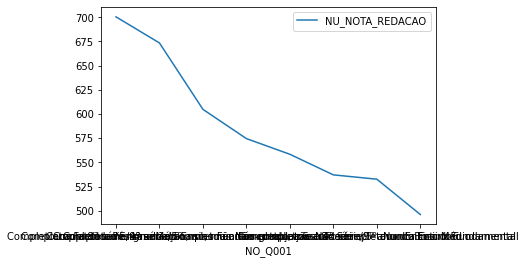

In [22]:
q001Redacao.plot()

2 - Por escolaridade da Mãe

In [23]:
q002Redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [24]:
q002Redacao

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,676.237352
Completou a Faculdade mas não completou a Pós-graduação,655.624887
"Completou o Ensino Médio, mas não completou a Faculdade",591.134491
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",558.917193
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",543.685715
Não completou a 4ª Série/5º ano do Ensino Fundamental,522.132595
Não sei,505.266910
Nunca Estudou,482.743138


<AxesSubplot:xlabel='NO_Q002'>

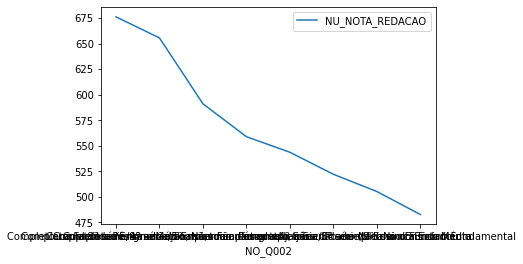

In [25]:
q002Redacao.plot()

In [26]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').describe()
#aqui podemos ver as excessões

NU_NOTA_REDACAO  \
                                                             count   
NO_Q002                                                              
Completou a 4ª série/5º ano, mas não completou ...        471827.0   
Completou a 8ª série/9º ano do Ensino Fundament...        475782.0   
Completou a Faculdade mas não completou a Pós-g...        416291.0   
Completou a Pós-graduação                                 333159.0   
Completou o Ensino Médio, mas não completou a F...       1234774.0   
Nunca Estudou                                             121022.0   
Não completou a 4ª Série/5º ano do Ensino Funda...        551516.0   
Não sei                                                    97636.0   

                                                                            \
                                                          mean         std   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...  543.685715  173.960894   
Completou a 8ª série/9º ano do Ensino Fundament...  558.917193  174.433183   
Completou a Faculdade mas não completou a Pós-g...  655.624887  174.884569   
Completou a Pós-graduação                           676.237352  175.468172   
Completou o Ensino Médio, mas não completou a F...  591.134491  174.828836   
Nunca Estudou                                       482.743138  181.014224   
Não completou a 4ª Série/5º ano do Ensino Funda...  522.132595  171.746067   
Não sei                                             505.266910  192.200038   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  460.0  560.0  640.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  480.0  560.0  640.0   
Completou a Faculdade mas não completou a Pós-g...  0.0  560.0  640.0  780.0   
Completou a Pós-graduação                           0.0  580.0  680.0  800.0   
Completou o Ensino Médio, mas não completou a F...  0.0  500.0  600.0  680.0   
Nunca Estudou                                       0.0  400.0  520.0  600.0   
Não completou a 4ª Série/5º ano do Ensino Funda...  0.0  440.0  540.0  620.0   
Não sei                                             0.0  420.0  540.0  620.0   

                                                            
                                                       max  
NO_Q002                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade mas não completou a Pós-g...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca Estudou                                       1000.0  
Não completou a 4ª Série/5º ano do Ensino Funda...   980.0  
Não sei                                              980.0

In [ ]:
colunasSelecionadas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA',
                       'NU_NOTA_MT', 'NU_NOTA_REDACAO',
                       'Q001', 'Q002']

# Análise exploratória sócioeconômico por estado

Adiciono a coluna SG_UF_RESIDENCIA ao dataset existente

In [27]:
microdadosEnemSelecionados['SG_UF_RESIDENCIA'] = microdadosEnem.SG_UF_RESIDENCIA

In [28]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_RESIDENCIA
0,190001004627,369.1,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",PA
1,190001004628,416.5,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",PA
2,190001004629,571.5,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ...",PA
5,190001004632,605.3,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",PA
6,190001004633,581.5,360.0,B,B,Não completou a 4ª Série/5º ano do Ensino Fund...,Não completou a 4ª Série/5º ano do Ensino Fund...,PA


abaixo eu faço o filtro para mostrar como das outras vezes a média das notas de redação dos candidados agrupado pela escolaridade da mãe, porém uso o where() que mostrará somente os candidatos de São Paulo

In [33]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                                        .where(microdadosEnemSelecionados.SG_UF_RESIDENCIA == 'SP')\
                                        .groupby('NO_Q002')\
                                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending='False')

,NU_NOTA_REDACAO
NO_Q002,
Nunca Estudou,485.318050
Não sei,517.689578
Não completou a 4ª Série/5º ano do Ensino Fundamental,532.361687
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",551.944673
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",565.287715
"Completou o Ensino Médio, mas não completou a Faculdade",594.542176
Completou a Faculdade mas não completou a Pós-graduação,658.657399
Completou a Pós-graduação,675.865656


In [35]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                                        .where(microdadosEnemSelecionados.SG_UF_RESIDENCIA == 'RJ')\
                                        .groupby('NO_Q002')\
                                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending='False')

,NU_NOTA_REDACAO
NO_Q002,
Nunca Estudou,491.069727
Não sei,532.756256
Não completou a 4ª Série/5º ano do Ensino Fundamental,535.806731
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",558.304487
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",575.725251
"Completou o Ensino Médio, mas não completou a Faculdade",609.309282
Completou a Faculdade mas não completou a Pós-graduação,689.380171
Completou a Pós-graduação,716.718042


In [38]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                                        .where(microdadosEnemSelecionados.SG_UF_RESIDENCIA == 'AC')\
                                        .groupby('NO_Q002')\
                                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending='False')

,NU_NOTA_REDACAO
NO_Q002,
Nunca Estudou,482.039891
Não sei,491.438127
Não completou a 4ª Série/5º ano do Ensino Fundamental,507.757732
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",525.582229
"Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio",531.748344
"Completou o Ensino Médio, mas não completou a Faculdade",555.554088
Completou a Faculdade mas não completou a Pós-graduação,599.402473
Completou a Pós-graduação,625.842014


In [42]:
microdadosEnemSelecionados.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'NO_Q002'])\
                                        .groupby(['SG_UF_RESIDENCIA', 'NO_Q002'])\
                                        .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       525.582229
                 Completou a 8ª série/9º ano do Ensino Fundament...       531.748344
                 Completou a Faculdade mas não completou a Pós-g...       599.402473
                 Completou a Pós-graduação                                625.842014
                 Completou o Ensino Médio, mas não completou a F...       555.554088
...                                                                              ...
TO               Completou a Pós-graduação                                640.348101
                 Completou o Ensino Médio, mas não completou a F...       560.324223
                 Nunca Estudou                                            467.408106
                 Não completou a 4ª Série/5º ano do Ensino Funda...       496.942438
                 Não sei                                                  502.063983

[216 rows x 1 columns]

## Visualizar por gráfico

Aqui importo o matplotlib para fazer o gráfico e conseguir visualizar todos os estados de forma mais simples

In [43]:
import matplotlib.pyplot as plt

Text(0.02, 0.65, 'A : Nunca Estudou\nB : Não completou a 4ª Série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamentalç, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

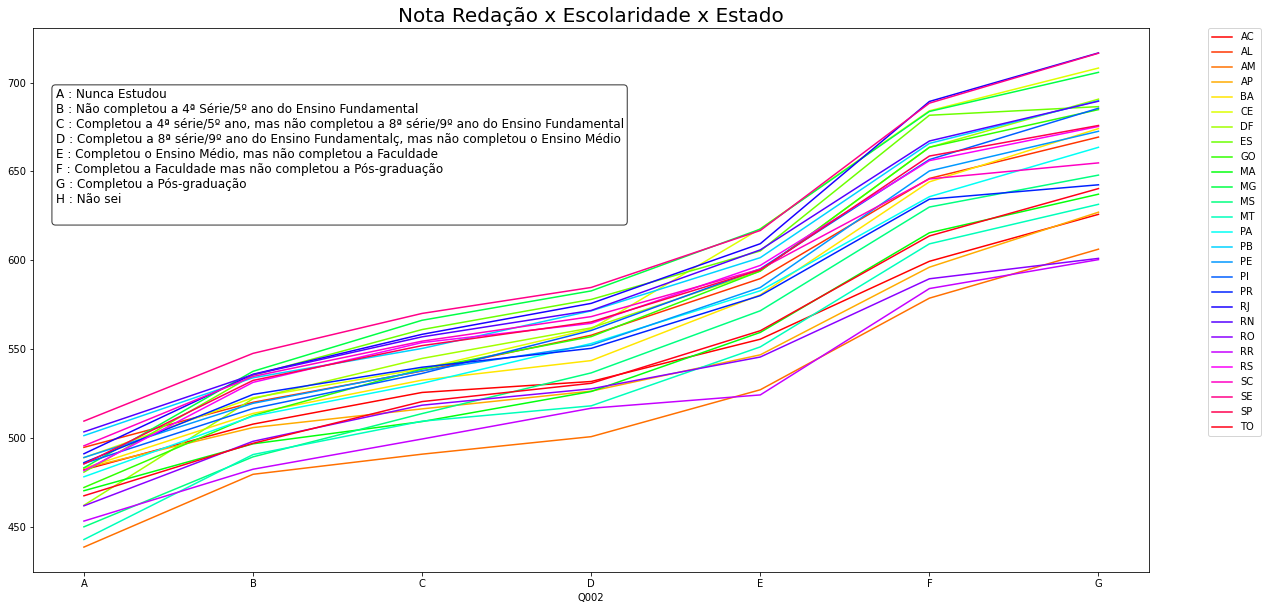

In [81]:
#fig, ax = plt.subplots(figsize=(17,12))
#plt.suptitle('Nota Redação x Escolaridade x Estado')

ax = microdadosEnemSelecionados.filter(items=['SG_UF_RESIDENCIA', 'Q002', 'NU_NOTA_REDACAO'])\
                                        .where(microdadosEnemSelecionados.Q002 != 'H')\
                                        .groupby(['Q002', 'SG_UF_RESIDENCIA'])\
                                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                        .unstack().plot(figsize=(20,10), colormap='hsv')

ax.set_title('Nota Redação x Escolaridade x Estado', fontsize=20)
#acima inclui um título e define sua fonte

#ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)
#aqui define a posição da caixa de legenda

import re 
#aqui importo o pacote de expressões regulares

handles, labels = ax.get_legend_handles_labels()
#declaro a variavel handles e labels que pega os itens das legendas

edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
#aqui crio uma nova variavel onde uso o pacore re para encontrar o padrão e filtrar as legendas deixando somente os estados
ax.legend(edited_labels, bbox_to_anchor=(1.1, 1), loc=0, borderaxespad=0)
#aqui define a posição da caixa de legenda


textdictQ002 = ""
for key, value in q001e002Dicionario.items():
    textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key, v=value)
    
ax.text(0.02,0.65, textdictQ002, transform=ax.transAxes, fontsize=12, color = 'black',
        bbox={'boxstyle':'round', 'facecolor':'white', 'alpha':0.8})
#aqui defino a caixa de legendas da escolaridade da mãe

